In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import Weibull as wb
from scipy.stats import weibull_min

In [37]:
def weibull(x, b, c):
    l = len(x)
    y = np.empty(dtype = np.float64, shape = l)
    for i in range(l):
       y[i] = wb.pdf(x[i], b, c)
        
    return y    

***
## <span style="color:red"> Gerando o x para os gráficos
***

x = [0.0, 4.0]

In [41]:
x  = np.linspace(0.0, 4.0, num = 1000)

---
---

*** 
##  <span style="color:red"> Funcao weibull do pacote scipy
***

In [42]:
c = 1.0
b = 5.0
mean = weibull_min.mean(b)
sig = weibull_min.std(b)
print(f'mu ={mean.round(3)}\nsig={sig.round(3)}')

mu =0.918
sig=0.21


### <span style="color:blue"> Gerando o y

In [43]:
y_sci = weibull_min.pdf(x, b)

---
---

***
## <span style="color:red"> Testando a minha função que calcula b e c
***

In [44]:
mu  = mean
sig = sig

b_hcca, c_hcca = wb.get_b_c(mu, sig, maxIt= 1000000, tol = 1e-9, alf=0.1)
print(f"b = {b_hcca}\nc = {c_hcca}")


***************************************
Res final 9.96902229201803e-10 para it 1772
***************************************
b = 5.000000053607477
c = 0.9999999993078381


In [45]:
### Erro nas media

In [46]:
res_mu  =  np.sqrt((mu - wb.media(b_hcca, c_hcca))**2)
res_sig =  np.sqrt((sig - wb.sig(b_hcca, c_hcca))**2)
print(f'|res_mu|  = {res_mu:e}\n|res_sig| = {res_sig:e}')

|res_mu|  = 6.645151e-11
|res_sig| = 2.074701e-09


In [47]:
res_b = np.sqrt((b - b_hcca)**2)
res_c = np.sqrt((c - c_hcca)**2)
print(f'|res_b| = {res_b:e}\n|res_c| = {res_c:e}')

|res_b| = 5.360748e-08
|res_c| = 6.921619e-10


### <span style="color:blue"> Gerando y utilzando a minha definição de weibull

In [48]:
y_hcca = weibull(x, b_hcca, c_hcca)

---
---

***
# <span style="color:red"> Plotando os gráficos
***

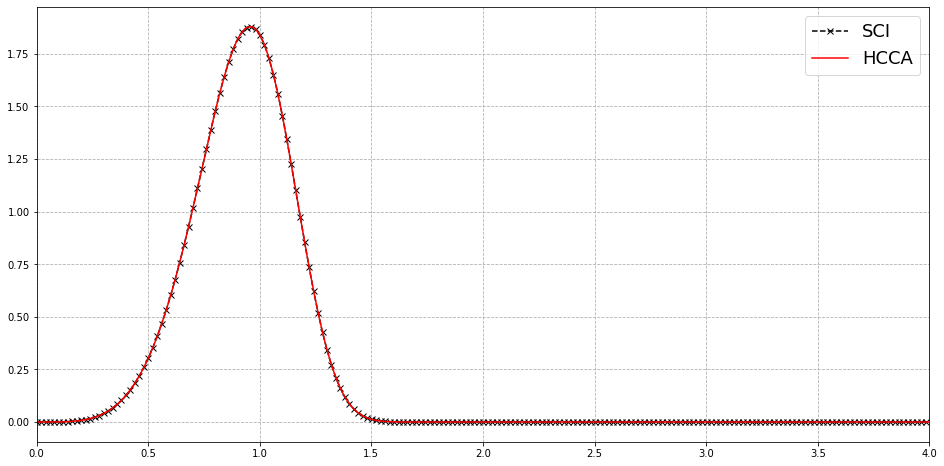

In [49]:
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(x, y_sci, ls = '--', label = 'SCI', color ='black', marker = 'x', markevery= 5)
ax.plot(x, y_hcca, label = 'HCCA', color = 'red')
ax.grid(ls ='--')
ax.set_xlim(0, 4)
ax.legend(fontsize=18)
ax